Data: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE163479

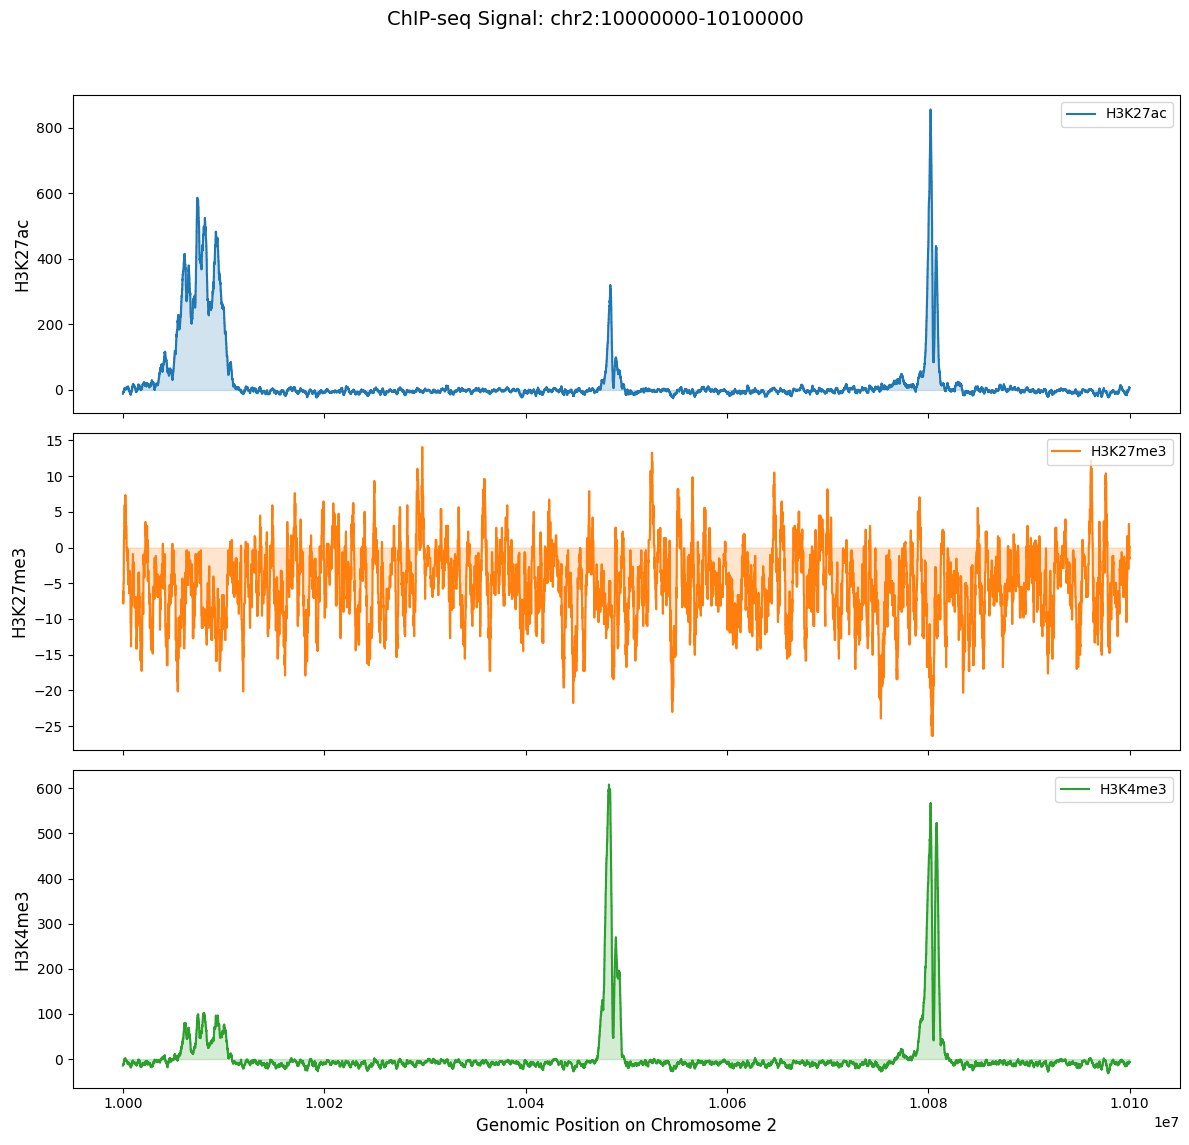

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pyBigWig

def visualize_chipseq(bigwig_files, chromosome, start, end):
    """
    Visualizes ChIP-seq data from BigWig files over a specified genomic region.

    Args:
        bigwig_files (dict): Dictionary mapping sample names to BigWig file paths.
        chromosome (str): Chromosome name (e.g., "chr1").
        start (int): Start position of the genomic region.
        end (int): End position of the genomic region.
    """

    num_tracks = len(bigwig_files)
    fig, axes = plt.subplots(num_tracks, 1, figsize=(12, 4 * num_tracks), sharex=True)
    if num_tracks == 1:
        axes = [axes]  # Ensure axes is always iterable

    x_coords = np.arange(start, end)
    
    # Get the default color cycle from Matplotlib
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']  # List of default Matplotlib colors

    for i, (sample_name, bw_file) in enumerate(bigwig_files.items()):
        try:
            bw = pyBigWig.open(bw_file)
            values = np.array(bw.values(chromosome, start, end))
            bw.close()

            values = np.nan_to_num(values, nan=0.0)  # Replace NaN values with zero

            color = colors[i % len(colors)]  # Cycle through colors if there are more tracks than colors
            
            line, = axes[i].plot(x_coords, values, label=sample_name, linewidth=1.5, color=color)
            axes[i].fill_between(x_coords, values, alpha=0.2, color=color)  
            axes[i].set_ylabel(sample_name, fontsize=12)
            axes[i].legend(loc='upper right')

        except RuntimeError as e:
            print(f"Error processing {bw_file}: {e}")
            axes[i].text(0.5, 0.5, f"Error loading {sample_name}",
                         horizontalalignment='center', verticalalignment='center',
                         transform=axes[i].transAxes, color='red', fontsize=12)

    axes[-1].set_xlabel(f"Genomic Position on Chromosome {chromosome}", fontsize=12)
    plt.suptitle(f"ChIP-seq Signal: chr{chromosome}:{start}-{end}", fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Prevent label overlap

    plt.savefig("chip-seq.pdf", format="pdf")  # Saves the plot as a PDF file
    plt.show()


if __name__ == "__main__":
    bigwig_files = {
        "H3K27ac": "GSE163479_CT_H3K27ac_spikeInNormalized_IgGsubstracted.bw",
        "H3K27me3": "GSE163479_CT_H3K27me3_spikeInNormalized_IgGsubstracted.bw",
        "H3K4me3": "GSE163479_CT_H3K4me3_spikeInNormalized_IgGsubstracted.bw",
    }

    chromosome = "2"
    start_position = 10000000
    end_position = 10100000

    visualize_chipseq(bigwig_files, chromosome, start_position, end_position)

In [38]:
import pyBigWig
import os # Import os module to check if files exist

# List of your BigWig files
bigwig_files_to_check = [
    "GSE163479_CT_H3K27ac_spikeInNormalized_IgGsubstracted.bw",
    "GSE163479_CT_H3K27me3_spikeInNormalized_IgGsubstracted.bw",
    "GSE163479_CT_H3K4me3_spikeInNormalized_IgGsubstracted.bw"
]

print("Checking chromosome information in BigWig files...\n")

for bw_file in bigwig_files_to_check:
    print(f"--- File: {bw_file} ---")
    if not os.path.exists(bw_file):
        print(f"Error: File not found at path: {bw_file}")
        print("-" * (len(bw_file) + 12))
        continue # Skip to the next file

    try:
        # Open the BigWig file safely using 'with'
        with pyBigWig.open(bw_file) as bw:
            # Get the dictionary of chromosome names and lengths
            chrom_info = bw.chroms()

            if not chrom_info:
                print("No chromosome information found in this file.")
            else:
                print("Available chromosomes and their lengths:")
                # Print each chromosome and its length
                for chrom, length in chrom_info.items():
                    print(f"  Chromosome: '{chrom}', Length: {length}")

    except RuntimeError as e:
        # Handle potential errors during file opening or reading
        print(f"Error processing file {bw_file}: {e}")

    print("-" * (len(bw_file) + 12) + "\n")

print("Finished checking files.")

Checking chromosome information in BigWig files...

--- File: GSE163479_CT_H3K27ac_spikeInNormalized_IgGsubstracted.bw ---
Available chromosomes and their lengths:
  Chromosome: '10', Length: 130694993
  Chromosome: '11', Length: 122082543
  Chromosome: '12', Length: 120129022
  Chromosome: '13', Length: 120421639
  Chromosome: '14', Length: 124902244
  Chromosome: '15', Length: 104043685
  Chromosome: '16', Length: 98207768
  Chromosome: '17', Length: 94987271
  Chromosome: '18', Length: 90702639
  Chromosome: '19', Length: 61431566
  Chromosome: '1', Length: 195471971
  Chromosome: '2', Length: 182113224
  Chromosome: '3', Length: 160039680
  Chromosome: '4', Length: 156508116
  Chromosome: '5', Length: 151834684
  Chromosome: '6', Length: 149736546
  Chromosome: '7', Length: 145441459
  Chromosome: '8', Length: 129401213
  Chromosome: '9', Length: 124595110
  Chromosome: 'MT', Length: 16299
  Chromosome: 'X', Length: 171031299
  Chromosome: 'Y', Length: 91744698
--------------------